<a href="https://colab.research.google.com/github/LeandroCoelhos/BeeData/blob/main/03.IFOOD/01.Ifood_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metadados

```
# Isto está formatado como código
```

#Contexto
Em 2021 o Ifood atingiu uma nova marca de 60 milhões de pedidos mensais, um crescimento de 100% em um ano; mais de 110.000 restaurantes se inscreveram na plataforma nos últimos 12 meses e só em março, o mês mais letal da pandemia para o Brasil, 270 mil restaurantes operavam com a plataforma.

A diversidade e amplitude de clientes que utilizam a plataforma do iFood é gigante - a cobertura do aplicativo se estende por muitas geografias no Brasil,
de múltiplos gostos, regionalismos e bolsos. Alguns buscam uma experiência no momento da refeição, outros só querem receber a marmita na hora
certa para não se atrasar para a primeira reunião pós-almoço. Neste contexto, precisamos entender melhor nossos clientes!


#Desafio
Este desafio te dá a liberdade de explorar diversas perguntas, que podem ajudar a entender melhor o comportamento e perfil de cada cliente, pensando na segmentação podemos descobrir:

- Quem é o mais fiel e quem mais compra conosco?
- Quem mais gosta de cupom?
- Quem gosta de entrega grátis?
- Qual o padrão de consumo?
- Qual o padrão de comportamento? Quanto os clientes vão gastar? Onde?
- Clientes que têm o maior tempo entre pedido e entrega têm menor recorrência na plataforma?
- Clientes que usam iOS (Apple) tem pedidos com maior ticket médio?
- Clientes com mais sessões fazem mais pedidos?

E claro este é só um ponto de partida, durante a exploração, pense em mais perguntas e outras possibilidades de uso dos dados que podem gerar valor para o negocio.

##Dados
Os dados representam um total de 20.249 clientes diferentes: únicos e anonimizados: na base: que realizaram 226.269 pedidos: em 7 meses (fevereiro a setembro): através de mais de 3.5 milhões de sessões abertas no aplicativo.

São 51 features dividas em 3 bases.

#Dicionario

##Order
```
order_id: ID único para pedido
order_shift:0 - 4:59h - weekday/weekend dawn5 - 9:59h - weekday/weekend breakfast10 - 14:59h - weekday/weekend lunch15 - 16:59h - weekday/weekend snack17 - 23:59h - weekday/weekend dinner
order_origin:"Tipo do Merchant: STORE (loja), QUICKLY_MEAL (refeição rápida e barata): RESTAURANT (restaurante)"
delivery_fee:Taxa de entrega paga pelo cliente
scheduled:Booleano que indica se o pedido foi agendado
total_amount:Valor total pago pelo cliente (em Unidades Monetárias UM)
subsidy_amount:"Subsídio: desconto dado no pedido (em Unidades Monetárias UM) - (para o valor final total do pedido: total_amount + subsidy)"
device_platform:"Plataforma (sistema operacional) utilizado para fazer o pedido (ANDROID, DESKTOP, etc)"
device_type:"Canal de origem do pedido (SITE, MOBILE, etc)"
device_app_version:Versão do aplicativo do iFood que fez o pedido
centroid_id:Id da centroide do clientes
state_label:Sigla da UF do cliente
city:Cidade do cliente
district:Bairro do cliente
customer_long:Longitude do cliente (até 2ª casa decimal) - ~1km
customer_lat:Latitude do cliente (até 2ª casa decimal) - ~1km
restaurant_id:Identificador do restaurante
dish_type:Tipo de cozinha
group_id:"Se o restaurante fizer parte de um grupo, essa é a identificação do grupo"
merchant_centroid_id:Id da centroide
merchant_state:Sigla do UF do Merchant
merchant_city:Cidade do Merchant
merchant_district:Distrito do Merchant
merchant_zipcode:CEP do Merchant
merchant_long:Longitude do Merchant (até 2ª casa decimal)
merchant_lat:Latitude do Merchant (até 2ª casa decimal)
has_free_delivery:Booleano que indica se o pedido foi entrega gratis
confirmed_date:Data que o pedido foi confirmado pelo restaurante
concluded_date:Data em que o pedido foi concluído
lag_last_order:Tempo em dias entre o pedido atual e o último pedido do cliente
account_id:ID do usuário

```
##Marketing
```
account_id:ID do usuário
registration_date:Data de registro da conta

platform_status:"Current customer situtation based on specific clusters:
 - New: First concluded order made on current month (Customer M0).
 - Reactivated: Customer have a concluded order on current month, no orders last month and is not a New Customer
 - Active: Customer have a concluded order on current month and is not Reactivated or New
 - Churn: Customer have concluded orders last month but hasn't mande and order on current month yet
 - Inactive: Customer has a first concluded order but hasn't been active on current and last month
 - Prospect: Customer hasn't made first order yet"

platform_status_last_month:"Current customer situtation based on specific clusters:
 - New: First concluded order made on current month (Customer M0).
 - Reactivated: Customer have a concluded order on current month, no orders last month and is not a New Customer
 - Active: Customer have a concluded order on current month and is not Reactivated or New
 - Churn: Customer have concluded orders last month but hasn't mande and order on current month yet
 - Inactive: Customer has a first concluded order but hasn't been active on current and last month
 - Prospect: Customer hasn't made first order yet"

total_order_count:Total de pedidos feito pelo cliente
first_order_date:Data do primeiro pedido feito pelo cliente

```
##Session
```
session_id:ID da sessão
user_account_uuid:ID do usuário
session_started:Horário de início da sessão
session_ended:Horário de término da sessão
install_timestamp:"Primeira instalação do app: após setup"
sum_view_restaurant_screen:Quantidade de restaurantes vistos
sum_view_dish_screen:Quantidade de pratos vistos
sum_click_add_item:"Quantidade de clicks: ao adicionar um item ao carrinho"
sum_view_checkout:Quantidade de eventos no checkout
sum_callback_purchase:Quantidade de eventos de callbacks
first_order_has_voucher:"Para fazer o primeiro pedido: foi utilizado voucher?"
media_campaign:Se sessão foi inciada por campanha de media
load_time:Tempo de carregamento inicial da sessão
available_restaurants:Quantidade de restaurantes disponíveis para o cliente no momento do pedido
review_score:
nps_score:
review_created_date:
```


# Imports

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_orders = pd.read_csv('/content/gdrive/MyDrive/BeeData/05.Ifood/data/Orders.csv', sep=';')
df_orders.head(1)

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.0,False,5375.0,0.0,ANDROID,MOBILE,9.39.1,...,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8,2020-02-28T19:06:31.861Z


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226269 entries, 0 to 226268
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              226269 non-null  object 
 1   order_shift           226269 non-null  object 
 2   order_origin          226269 non-null  object 
 3   delivery_fee          226269 non-null  float64
 4   scheduled             226269 non-null  bool   
 5   total_amount          226269 non-null  float64
 6   subsidy_amount        226269 non-null  float64
 7   device_platform       226269 non-null  object 
 8   device_type           226269 non-null  object 
 9   device_app_version    221834 non-null  object 
 10  centroid_id           226269 non-null  object 
 11  state_label           226269 non-null  object 
 12  city                  226269 non-null  object 
 13  district              226269 non-null  object 
 14  customer_long         226269 non-null  float64
 15  

In [ ]:
df_marketing = pd.read_csv('/content/gdrive/MyDrive/BeeData/05.Ifood/data/Marketing.csv', sep=';')
df_marketing.head(1)

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28


In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20249 entries, 0 to 20248
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   account_id               20249 non-null  object
 1   registration_date        20249 non-null  object
 2   ifood_status             20249 non-null  object
 3   ifood_status_last_month  20249 non-null  object
 4   total_order_count        20249 non-null  int64 
 5   first_order_date         20248 non-null  object
dtypes: int64(1), object(5)
memory usage: 949.3+ KB


In [ ]:
df_sessions = pd.read_csv('/content/gdrive/MyDrive/BeeData/05.Ifood/data/sessions.csv', sep=';')
df_sessions.head(1)

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01T00:00:03.924Z,2020-02-01T00:10:51.217Z,NaN,19,5,6,6,7,False,NaN,5.0,462.0,1


In [ ]:
df_sessions.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591511 entries, 0 to 3591510
Data columns (total 15 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   session_id                  3591511 non-null  object 
 1   user_account_uuid           3591511 non-null  object 
 2   session_started             3591511 non-null  object 
 3   session_ended               3545766 non-null  object 
 4   install_timestamp           11543 non-null    object 
 5   sum_view_restaurant_screen  3591511 non-null  int64  
 6   sum_view_dish_screen        3591511 non-null  int64  
 7   sum_click_add_item          3591511 non-null  int64  
 8   sum_view_checkout           3591511 non-null  int64  
 9   sum_callback_purchase       3591511 non-null  int64  
 10  first_order_has_voucher     420630 non-null   object 
 11  media_campaign              53423 non-null    object 
 12  load_time                   2848111 non-null  float64
 1

# Começando pelo Marketing

### perguntas

In [ ]:
# plot de ano de criação da conta ok
# mes de criação da conta ok
# plot de tempo entre a criação de uma conta e a primeira compra
# comparar ativos de um mes para o outro

In [ ]:
df_marketing.shape

(20249, 6)

In [ ]:
#registro sem nenhuma unica compra
df_marketing = df_marketing[df_marketing['account_id'] != '7745ad02-1ff9-45be-9227-a9306857cdcb']

### Criação de Datas

In [ ]:
def por_data(df_aux, cols):
  df = df_aux.copy()
  for col in cols:
    df[col] = pd.to_datetime(df[col])
    df[col+'_year'] = df[col].dt.year.astype(int,errors='ignore') #vi que estava retornando erro, data em branco
    df[col+'_month'] = df[col].dt.month.astype(int,errors='ignore')
    df[col+'_day'] = df[col].dt.day.astype(int,errors='ignore')
  return df

df_mark_dt = por_data(df_marketing, ['registration_date', 'first_order_date'])
df_mark_dt.head(1)

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date,registration_date_year,registration_date_month,registration_date_day,first_order_date_year,first_order_date_month,first_order_date_day
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28,2020,2,2,2020,2,28


### Ano de Criação da Conta

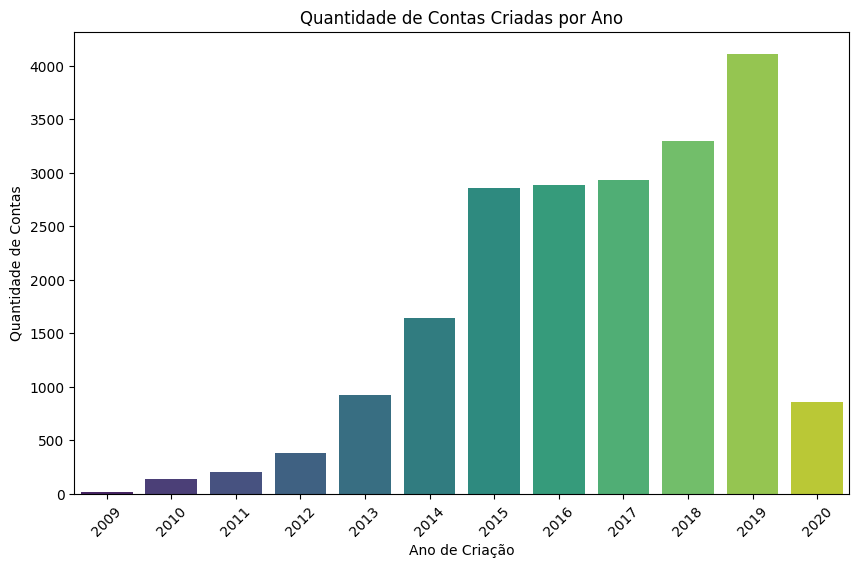

In [ ]:
# Cria um gráfico de contagem
plt.figure(figsize=(10, 6))
sns.countplot(data=df_mark_dt, x='registration_date_year', palette='viridis',width=0.8)
plt.title('Quantidade de Contas Criadas por Ano')
plt.xlabel('Ano de Criação')
plt.ylabel('Quantidade de Contas')
plt.xticks(rotation=45)  # Para rotacionar os rótulos do eixo x, se necessário
plt.show()

In [ ]:
df_mark_dt[df_mark_dt.registration_date_year == 2020].registration_date_month.max() #mes máximo de registro de 2020

2

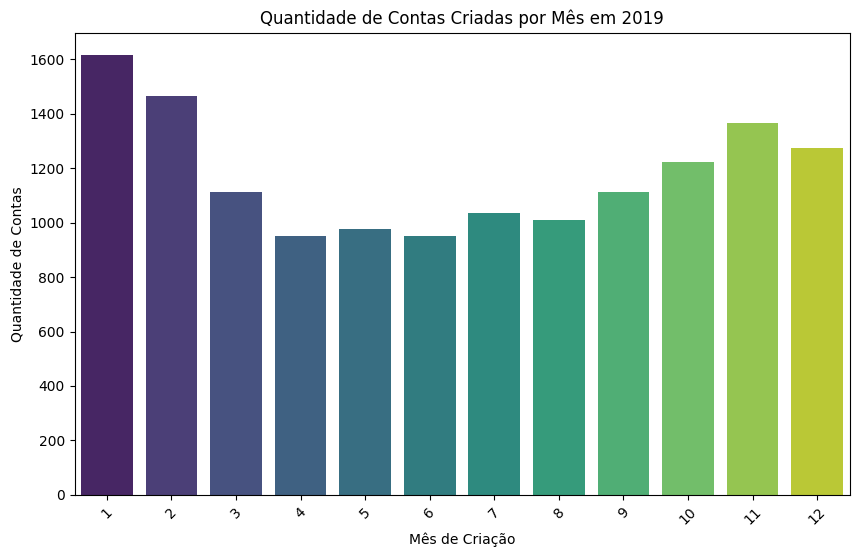

In [ ]:
# Cria um gráfico de contagem
fil = df_mark_dt.registration_date_year >= 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=df_mark_dt[fil], x='registration_date_month', palette='viridis',width=0.8)
plt.title('Quantidade de Contas Criadas por Mês em 2019')
plt.xlabel('Mês de Criação')
plt.ylabel('Quantidade de Contas')
plt.xticks(rotation=45)
plt.show()

### Qual o tempo de conta dos clientes?

In [ ]:
df_mark_dt['customer_tenure'] = (pd.to_datetime('2020-02-29') - df_mark_dt['registration_date']).dt.days

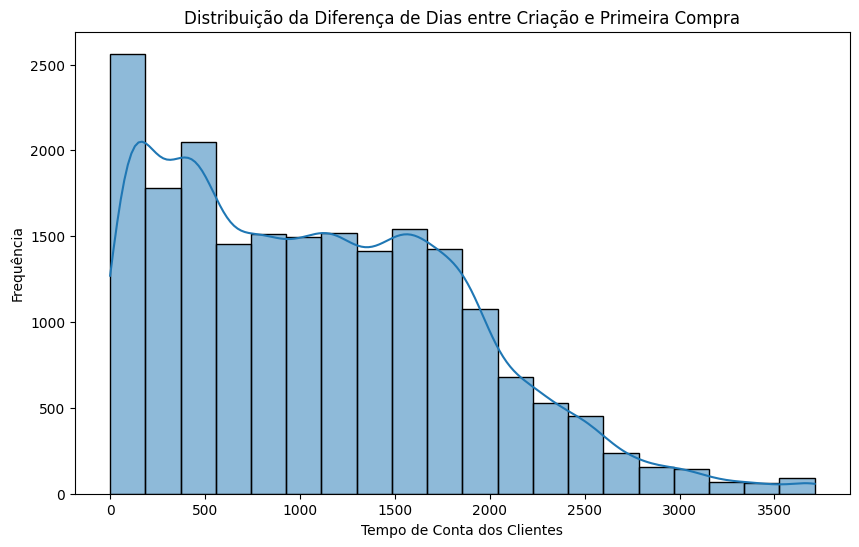

In [ ]:
# Crie um histograma da coluna 'diferenca_dias'.
plt.figure(figsize=(10, 6))
sns.histplot(df_mark_dt['customer_tenure'], bins=20, kde=True)  # Você pode ajustar o número de bins conforme necessário.
plt.xlabel('Tempo de Conta dos Clientes')
plt.ylabel('Frequência')
plt.title('Distribuição da Diferença de Dias entre Criação e Primeira Compra')
plt.show()

### Quantas dessas contas criadas nos ultimos 4 anos estão ativas?

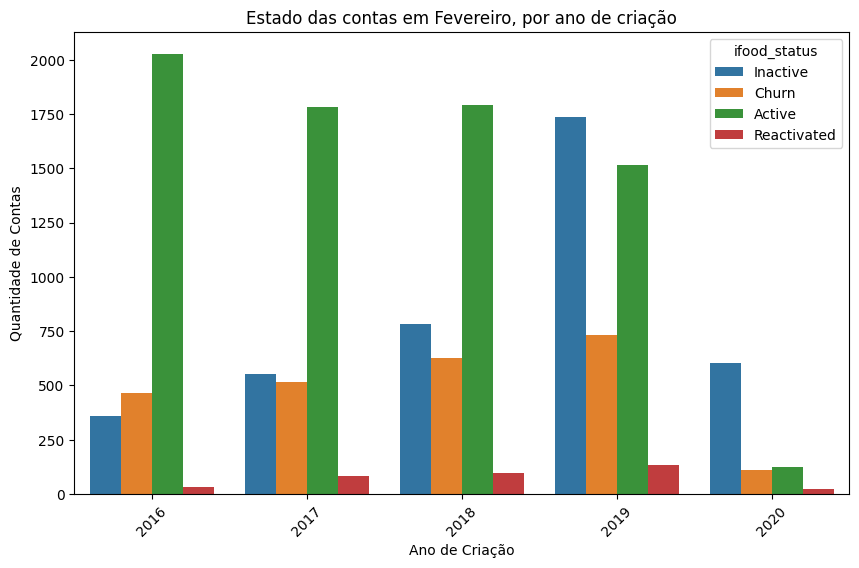

In [ ]:
# Cria um gráfico de contagem
plt.figure(figsize=(10, 6))
fil = df_mark_dt.registration_date_year.isin([2016,2017,2018, 2019, 2020])
sns.countplot(data=df_mark_dt[fil], x='registration_date_year', hue='ifood_status',width=0.8)
plt.title('Estado das contas em Fevereiro, por ano de criação')
plt.xlabel('Ano de Criação')
plt.ylabel('Quantidade de Contas')
plt.xticks(rotation=45)  # Para rotacionar os rótulos do eixo x, se necessário
plt.show()

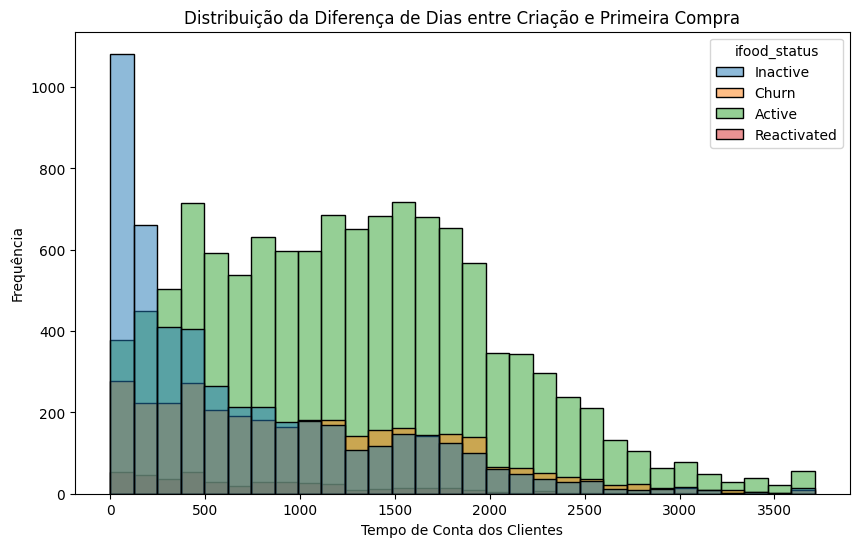

In [ ]:
# Crie um histograma da coluna 'diferenca_dias'.
plt.figure(figsize=(10, 6))
sns.histplot(df_mark_dt, x='customer_tenure', hue='ifood_status',  bins=30)  # Você pode ajustar o número de bins conforme necessário.
plt.xlabel('Tempo de Conta dos Clientes')
plt.ylabel('Frequência')
plt.title('Distribuição da Diferença de Dias entre Criação e Primeira Compra')
plt.show()

### Tempo entre a criação da conta e a primeira compra?

In [ ]:
df_mark_dt['sleep_time'] = (df_mark_dt['registration_date'] - df_mark_dt['first_order_date']).dt.days

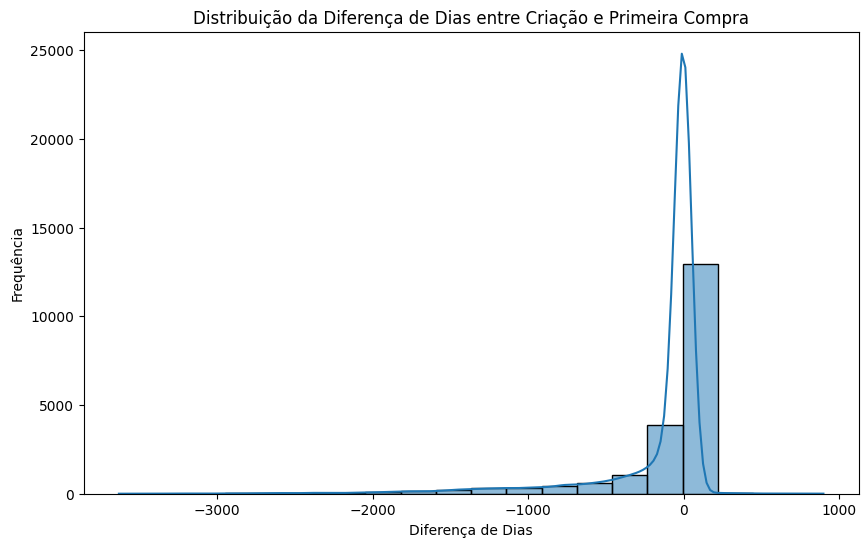

In [ ]:
# Crie um histograma da coluna 'diferenca_dias'.
plt.figure(figsize=(10, 6))
sns.histplot(df_mark_dt['sleep_time'], bins=20, kde=True)  # Você pode ajustar o número de bins conforme necessário.
plt.xlabel('Diferença de Dias')
plt.ylabel('Frequência')
plt.title('Distribuição da Diferença de Dias entre Criação e Primeira Compra')
plt.show()

In [ ]:
df_mark_dt.sleep_time.describe()

count    20248.000000
mean      -155.923548
std        396.336218
min      -3633.000000
25%        -64.000000
50%          0.000000
75%          0.000000
max        899.000000
Name: sleep_time, dtype: float64

In [ ]:
df_mark_dt.groupby('registration_date_year')['sleep_time'].agg(['min', 'max' ,'mean','std','median'])

,min,max,mean,std,median
registration_date_year,,,,,
2009,-3281,-2524,-2858.666667,280.075670,-2899.0
2010,-3633,-1065,-1938.978261,605.154797,-1803.0
2011,-3280,-21,-1298.630000,745.783338,-1190.5
2012,-2960,348,-666.090909,823.543632,-123.0
2013,-2475,574,-445.258134,644.524475,-21.0
2014,-2124,899,-309.082117,515.352826,-1.0
2015,-1784,1,-211.803990,385.282114,0.0
2016,-1446,1,-84.777932,231.935122,0.0
2017,-1133,1,-77.445126,192.514499,0.0


### Quem ta errado aqui?

In [ ]:
df_mark_dt['sleep_time'] = (df_mark_dt['first_order_date'] - df_mark_dt['registration_date']).dt.days

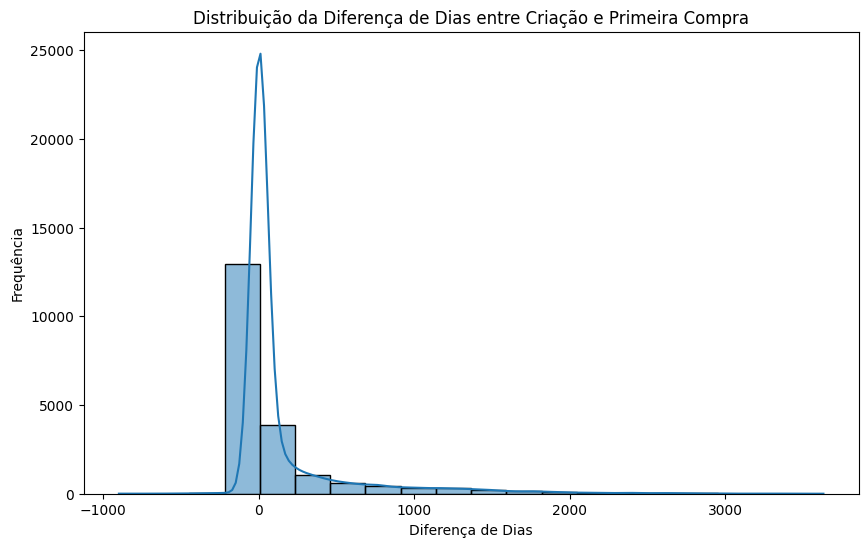

In [ ]:
# Crie um histograma da coluna 'diferenca_dias'.
plt.figure(figsize=(10, 6))
sns.histplot(df_mark_dt['sleep_time'], bins=20, kde=True)  # Você pode ajustar o número de bins conforme necessário.
plt.xlabel('Diferença de Dias')
plt.ylabel('Frequência')
plt.title('Distribuição da Diferença de Dias entre Criação e Primeira Compra')
plt.show()

In [ ]:
df_mark_dt.groupby('registration_date_year')['sleep_time'].agg(['min', 'max' ,'mean','std','median'])

,min,max,mean,std,median
registration_date_year,,,,,
2009,2524,3281,2858.666667,280.075670,2899.0
2010,1065,3633,1938.978261,605.154797,1803.0
2011,21,3280,1298.630000,745.783338,1190.5
2012,-348,2960,666.090909,823.543632,123.0
2013,-574,2475,445.258134,644.524475,21.0
2014,-899,2124,309.082117,515.352826,1.0
2015,-1,1784,211.803990,385.282114,0.0
2016,-1,1446,84.777932,231.935122,0.0
2017,-1,1133,77.445126,192.514499,0.0


### Como esta variando o status dos meus clientes?

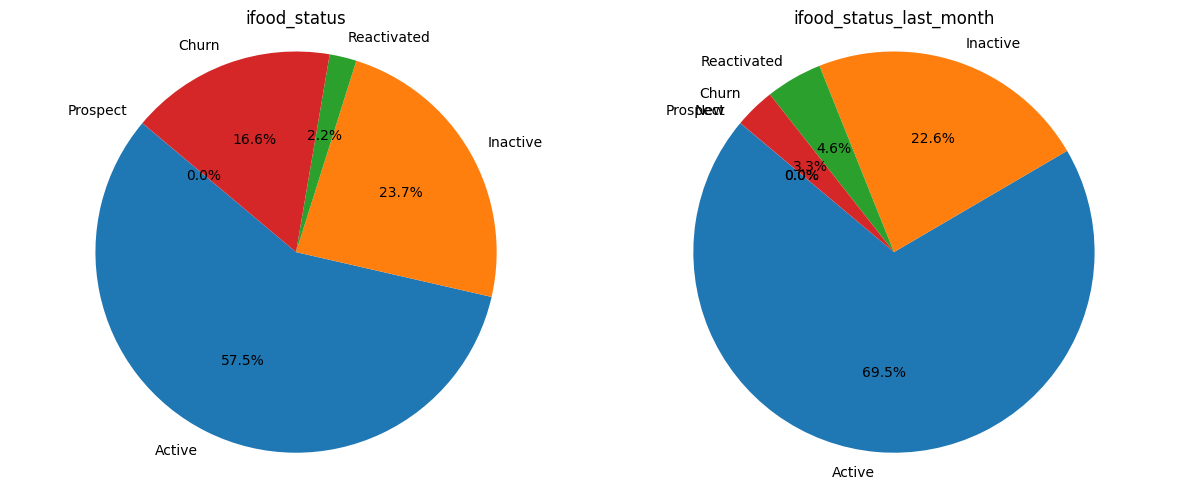

In [ ]:
# Dados e rótulos para ifood_status
statuses = ['Active', 'Inactive', 'Reactivated', 'Churn', 'Prospect']
counts_status = [11648, 4805, 440, 3355, 1]

# Dados e rótulos para ifood_status_last_month
statuses_last_month = ['Active', 'Inactive', 'Reactivated', 'Churn', 'New', 'Prospect']
counts_status_last_month = [14080, 4583, 922, 662, 1, 1]

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de pizza para ifood_status
axs[0].pie(counts_status, labels=statuses, autopct='%1.1f%%', startangle=140)
axs[0].set_title('ifood_status')
axs[0].axis('equal')

# Gráfico de pizza para ifood_status_last_month
axs[1].pie(counts_status_last_month, labels=statuses_last_month, autopct='%1.1f%%', startangle=140)
axs[1].set_title('ifood_status_last_month')
axs[1].axis('equal')

# Ajuste o espaçamento entre os gráficos
plt.tight_layout()

# Exibir os gráficos lado a lado
plt.show()

### platform_status:"Current customer situtation based on specific clusters:
 - New: First concluded order made on current month (Customer M0).
 - Reactivated: Customer have a concluded order on current month, no orders last month and is not a New Customer
 - Active: Customer have a concluded order on current month and is not Reactivated or New
 - Churn: Customer have concluded orders last month but hasn't mande and order on current month yet
 - Inactive: Customer has a first concluded order but hasn't been active on current and last month
 - Prospect: Customer hasn't made first order yet"

### Para quais grupos eles estão migrando?

In [ ]:
df_mark_dt.groupby([ "ifood_status_last_month","ifood_status"], as_index=False).agg({ "account_id": "count" })

,ifood_status_last_month,ifood_status,account_id
0,Active,Active,11312
1,Active,Churn,2768
2,Churn,Inactive,428
3,Churn,Reactivated,234
4,Inactive,Inactive,4377
5,Inactive,Reactivated,206
6,New,Churn,1
7,Reactivated,Active,336
8,Reactivated,Churn,586


In [ ]:
import plotly.graph_objects as go
node_colors = [
    "#1f77b4",  # Azul escuro
    "#d62728",  # Vermelho escuro
    "#2ca02c",  # Verde escuro
    "#9467bd",  # Roxo escuro
    "#ff7f0e",  # Laranja escuro
    "#e377c2",  # Rosa escuro
    "#aec7e8",  # Azul claro
    "#ff9896",  # Vermelho claro
    "#98df8a",  # Verde claro
    "#c5b0d5",  # Roxo claro
    "#ffbb78",  # Laranja claro
    "#f7b6d2"   # Rosa claro
]

# Dados de exemplo
labels = ["Active", "Churn","Inactive", "New","Reactivated", "Prospect", "Active", "Churn","Inactive", "New","Reactivated", "Prospect"]
         # 0          1         2         3       4             5

source_indices = [0, 0, 1, 1, 2, 2, 3, 4, 4]
target_indices = [6, 7, 8, 10, 8, 10, 7, 6, 7]
values = [11312, 2768, 428, 234, 4377, 206, 1, 336, 586]

# Crie um objeto Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

# Layout do gráfico
fig.update_layout(title_text="Fluxo Status de Janeiro para fevereiro")
fig.show()

### Tenho Clientes mais engajados/fidelizados?

In [ ]:
df_mark_dt['purchase_rate'] = df_mark_dt['total_order_count']/(df_mark_dt['customer_tenure'])

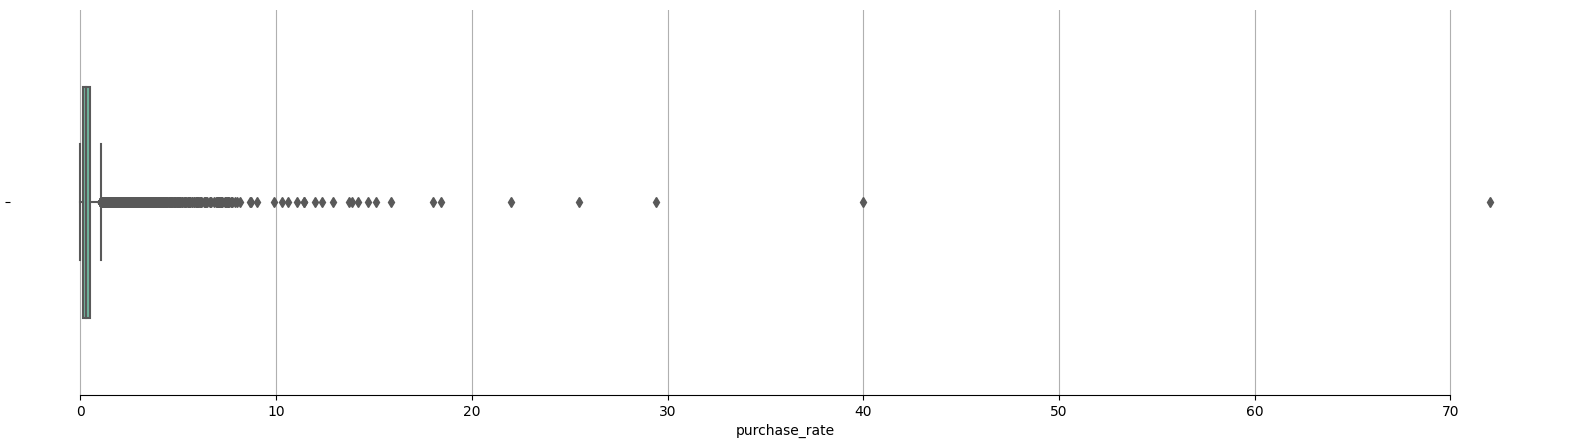

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x = df_mark_dt['purchase_rate'], width=.6, palette="BuGn")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.show()

Text(0.5, 1.0, 'Distribuição da Pontuação dos clientes mais Engajados')

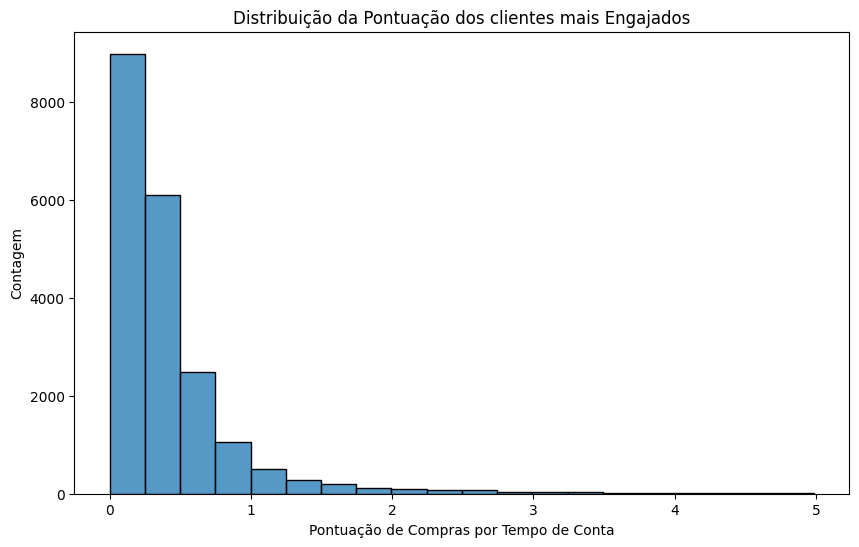

In [ ]:
# Crie um histograma
fil = df_mark_dt.purchase_rate<5
plt.figure(figsize=(10, 6))
sns.histplot(df_mark_dt[fil]['purchase_rate'], bins=20, kde=False)  # Você pode ajustar o número de bins conforme necessário.
plt.xlabel('Pontuação de Compras por Tempo de Conta')
plt.ylabel('Contagem')
plt.title('Distribuição da Pontuação dos clientes mais Engajados')

In [ ]:
df_mark_dt['purchase_rate'].describe()

count    2.024800e+04
mean              inf
std               NaN
min      6.016847e-04
25%      1.343586e-01
50%      2.860814e-01
75%      5.049141e-01
max               inf
Name: purchase_rate, dtype: float64

# Inicial

In [ ]:
cols = df_marketing.columns
for col in cols:
  print('')
  display(df_marketing[col].value_counts(dropna=False))

7c0450e7-a806-4208-8449-e4269a27e6b5    1
159c3b4d-76db-4e4e-9b01-27de9a596876    1
9cf72aec-83a0-4c37-b03d-0c4d4a8b8bc1    1
6df59c7c-765d-4a84-82b8-3359cb94c1a5    1
df7d55e0-ac6d-467e-bc22-ddd7560858a8    1
                                       ..
13011e44-4ff2-4d49-8aaa-91e146edcfc8    1
eb981934-6118-44e2-ab42-2226d977e55d    1
e6a668dc-914a-49fb-8c2b-1b569d4e1175    1
c2aae1ae-82c4-40f4-9e49-b018baa3b115    1
ed2a5774-8181-4d38-94ac-1dd55f3f5da3    1
Name: account_id, Length: 20248, dtype: int64

2010-01-05    49
2019-11-30    29
2018-10-14    29
2020-01-28    28
2019-11-28    27
              ..
2010-11-08     1
2010-09-13     1
2011-10-25     1
2013-05-08     1
2011-02-18     1
Name: registration_date, Length: 2994, dtype: int64

Active         11648
Inactive        4805
Churn           3355
Reactivated      440
Name: ifood_status, dtype: int64

Active         14080
Inactive        4583
Reactivated      922
Churn            662
New                1
Name: ifood_status_last_month, dtype: int64

1       334
2       179
3       167
4       138
5       115
       ... 
1651      1
1330      1
1102      1
1030      1
2146      1
Name: total_order_count, Length: 1407, dtype: int64

2020-02-14    49
2020-02-09    43
2020-02-15    40
2020-02-21    40
2020-02-08    39
              ..
2013-02-28     1
2013-08-15     1
2014-04-01     1
2013-06-25     1
2012-01-16     1
Name: first_order_date, Length: 2666, dtype: int64

Text(0.5, 1.0, 'Total de Pedidos de Clientes')

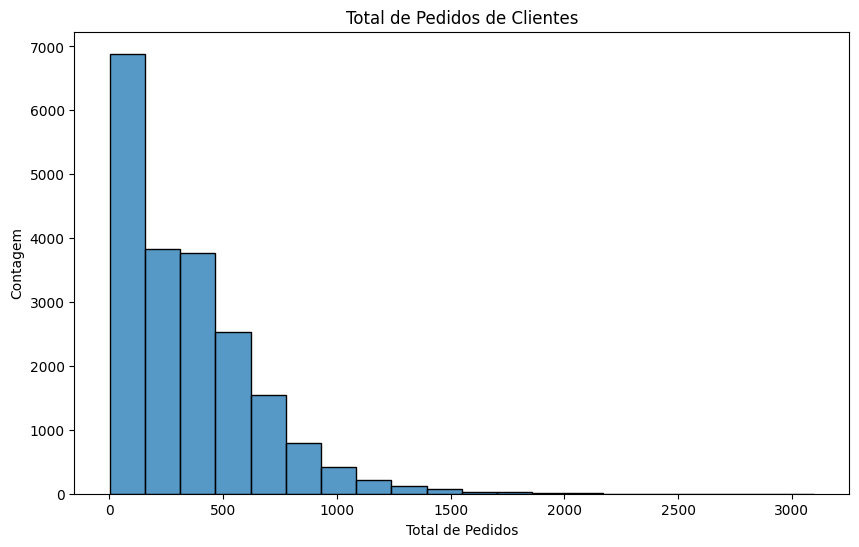

In [ ]:
# Crie um histograma
#fil = df_mark_dt.purchase_rate<5
plt.figure(figsize=(10, 6))
sns.histplot(df_mark_dt['total_order_count'], bins=20, kde=False)  # Você pode ajustar o número de bins conforme necessário.
plt.xlabel('Total de Pedidos')
plt.ylabel('Contagem')
plt.title('Total de Pedidos de Clientes')

In [ ]:
df_mark_dt['total_order_count'].describe()

count    20248.000000
mean       341.338058
std        303.148108
min          1.000000
25%         91.000000
50%        286.000000
75%        501.000000
max       3098.000000
Name: total_order_count, dtype: float64